In [2]:
#!pip install missingno

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [4]:
amazon_titles = pd.read_csv("data_1/titles.csv")
appletv_titles = pd.read_csv("data_2/titles.csv")
disney_titles = pd.read_csv("data_3/titles.csv")
hbo_titles = pd.read_csv("data_4/titles.csv")
netflix_titles = pd.read_csv("data_5/titles.csv")
paramount_titles = pd.read_csv("data_6/titles.csv")

In [5]:
titles = pd.concat([amazon_titles, appletv_titles, disney_titles, hbo_titles, netflix_titles, paramount_titles], axis=0).reset_index()
titles.drop(['index'], axis=1, inplace=True)

In [6]:
titles[titles.duplicated() == True].head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
7151,ts20371,Top Gear,SHOW,This fast-paced and stunt-filled motor show te...,2002,TV-PG,58,"['comedy', 'reality', 'european', 'music']",['GB'],33.0,tt1628033,8.7,120892.0,65.944,7.380
7153,tm44313,The Lord of the Rings: The Fellowship of the Ring,MOVIE,"Young hobbit Frodo Baggins, after inheriting a...",2001,PG-13,178,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,tt0120737,8.8,1895545.0,110.122,8.394
7162,tm56184,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"['drama', 'thriller', 'action', 'crime']","['GB', 'US']",NaN,tt0468569,9.0,2684317.0,81.703,8.508
7180,tm115982,The Lord of the Rings: The Two Towers,MOVIE,Frodo and Sam are trekking to Mordor to destro...,2002,PG-13,179,"['action', 'fantasy', 'drama']","['NZ', 'US']",NaN,tt0167261,8.8,1684864.0,87.778,8.375
7182,tm142381,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,tt0167260,9.0,1865989.0,83.617,8.474


In [7]:
titles.shape

(25246, 15)

In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25246 entries, 0 to 25245
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25246 non-null  object 
 1   title                 25246 non-null  object 
 2   type                  25246 non-null  object 
 3   description           25050 non-null  object 
 4   release_year          25246 non-null  int64  
 5   age_certification     12097 non-null  object 
 6   runtime               25246 non-null  int64  
 7   genres                25246 non-null  object 
 8   production_countries  25246 non-null  object 
 9   seasons               5791 non-null   float64
 10  imdb_id               23260 non-null  object 
 11  imdb_score            22646 non-null  float64
 12  imdb_votes            22586 non-null  float64
 13  tmdb_popularity       24519 non-null  float64
 14  tmdb_score            22109 non-null  float64
dtypes: float64(5), int6

In [9]:
# drop duplicates 
titles.drop_duplicates(inplace=True)

In [10]:
titles.shape

(23362, 15)

In [11]:
# Null values
titles.isna().sum()

id                          0
title                       0
type                        0
description               195
release_year                0
age_certification       11981
runtime                     0
genres                      0
production_countries        0
seasons                 17739
imdb_id                  1950
imdb_score               2558
imdb_votes               2618
tmdb_popularity           720
tmdb_score               3000
dtype: int64

### Show missing data using missingno library 

Text(0.5, 1.0, 'Distribution of Missing Values')

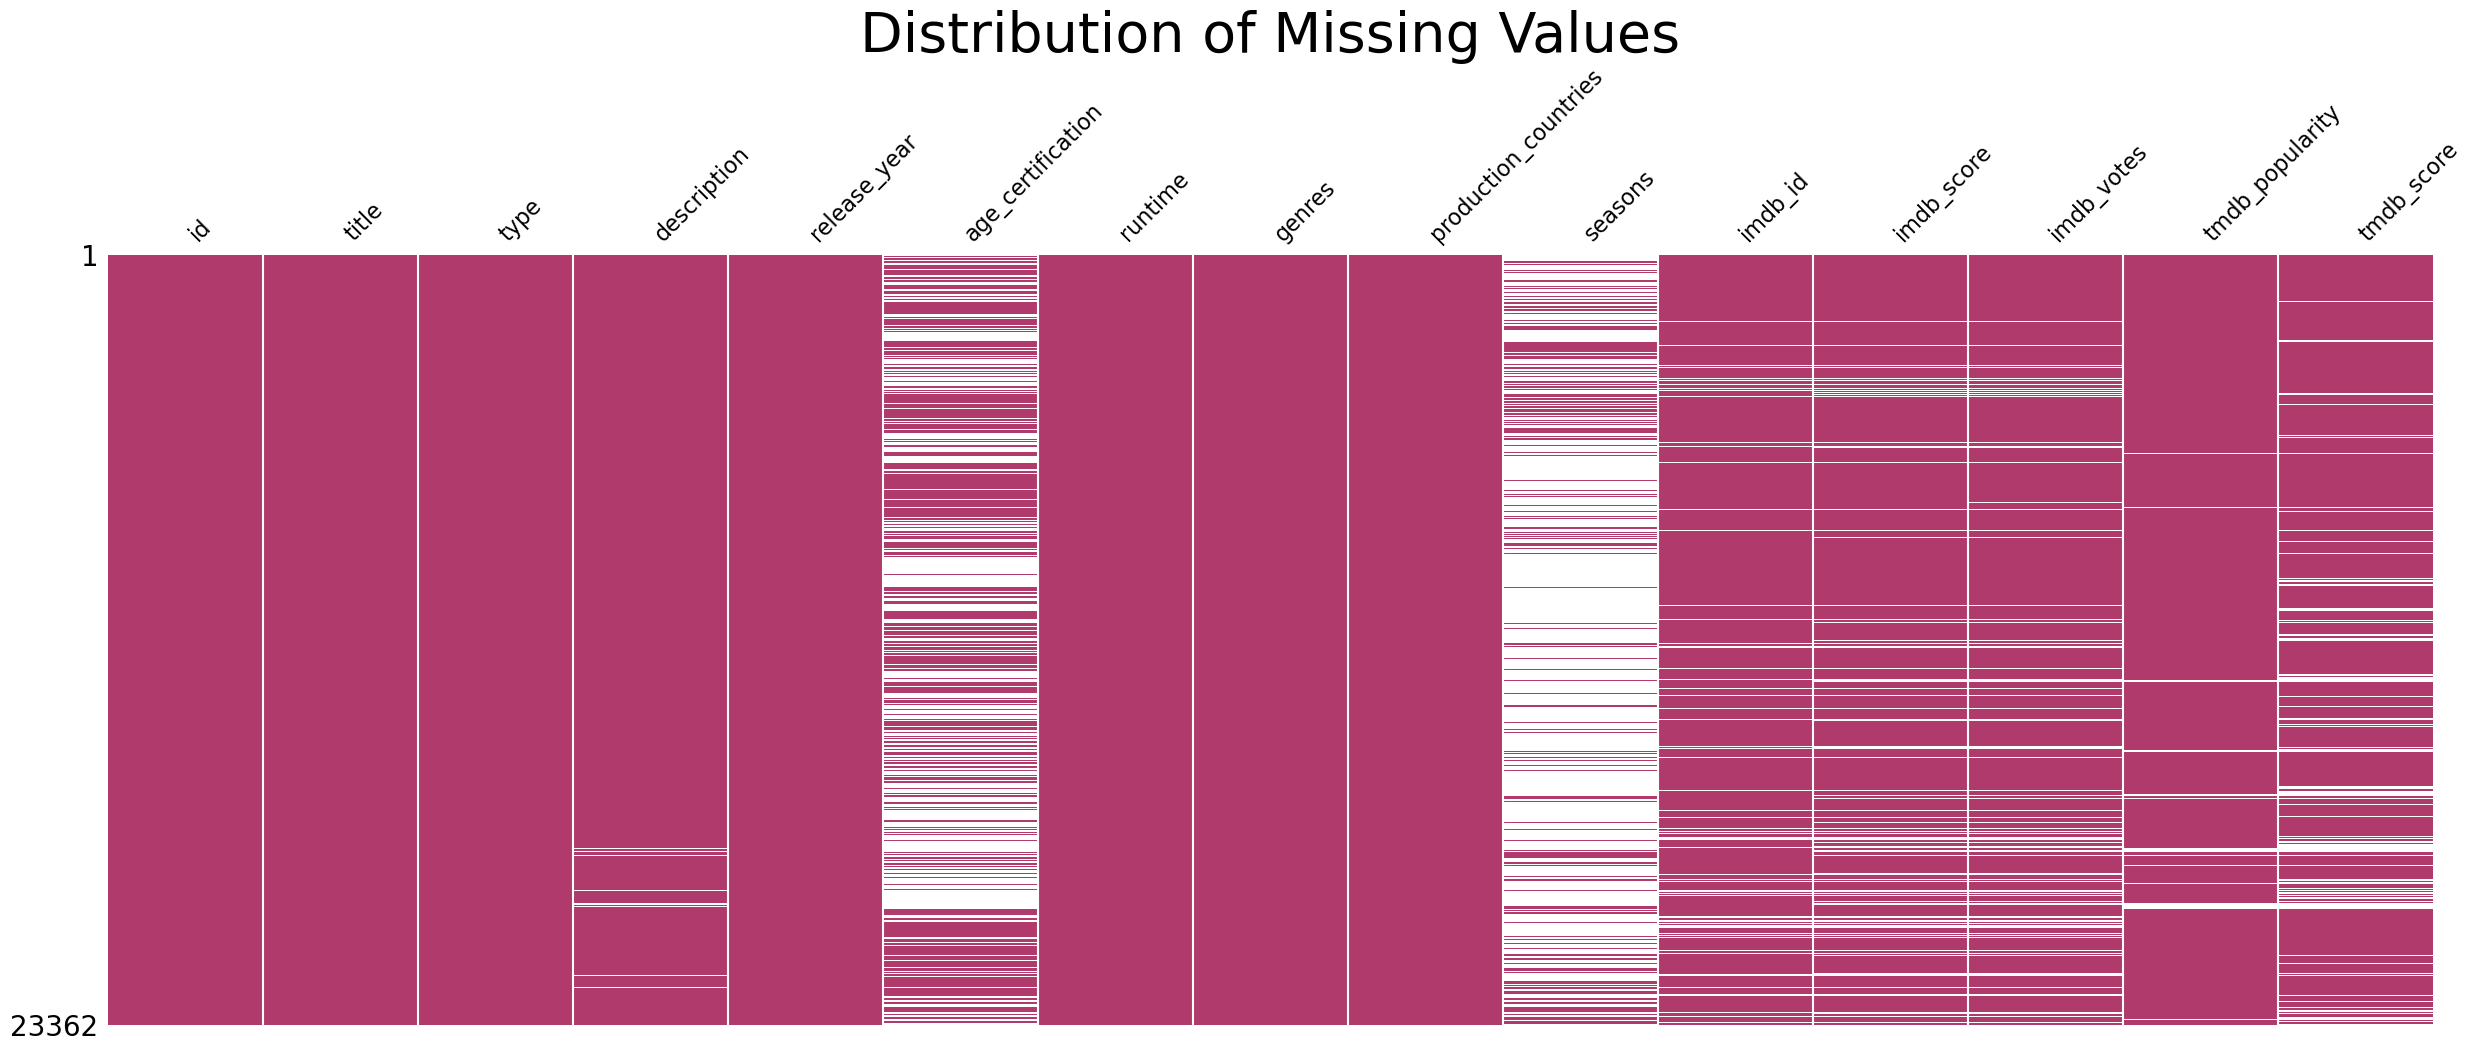

In [12]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

## Handling the 'genres' and 'production_countries' columns

#### These two columns are formed by list values, so we need to handle these values to work with a single value.

In [13]:
# genres
titles['genres'] = titles['genres'].str.replace(r'[','').str.replace("'",'').str.replace(r']','')
titles['genre'] = titles['genres'].str.split(',').str[0]

In [14]:
# For countries
titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
titles['production_country'] = titles['production_countries'].str.split(',').str[0]

Text(0.5, 1.0, 'Distribution of Missing Values')

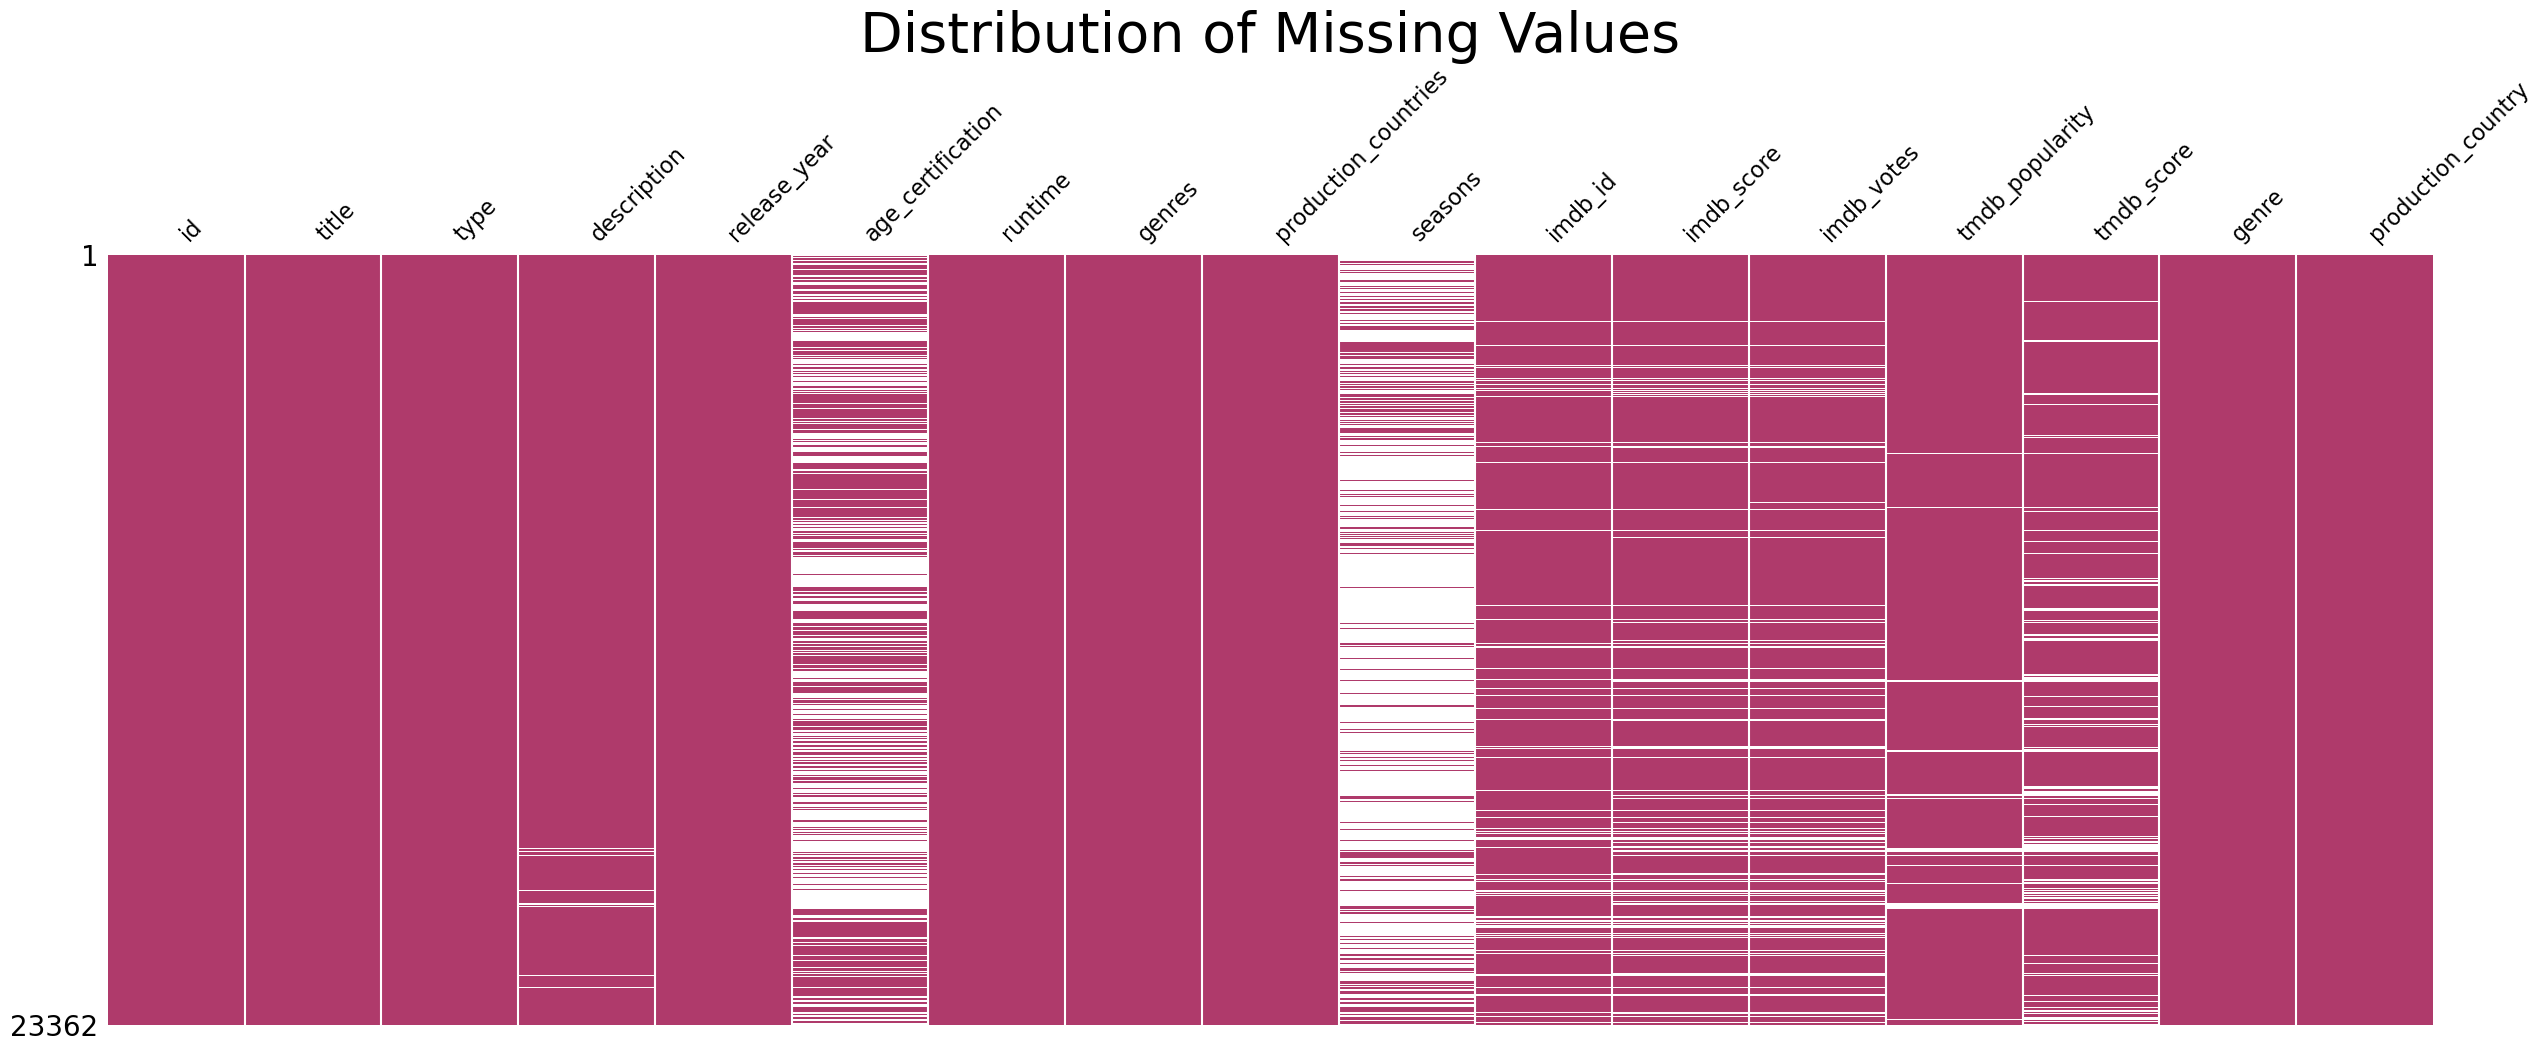

In [15]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

In [16]:

titles.drop(['genres', 'production_countries'], axis=1, inplace=True)


Text(0.5, 1.0, 'Distribution of Missing Values')

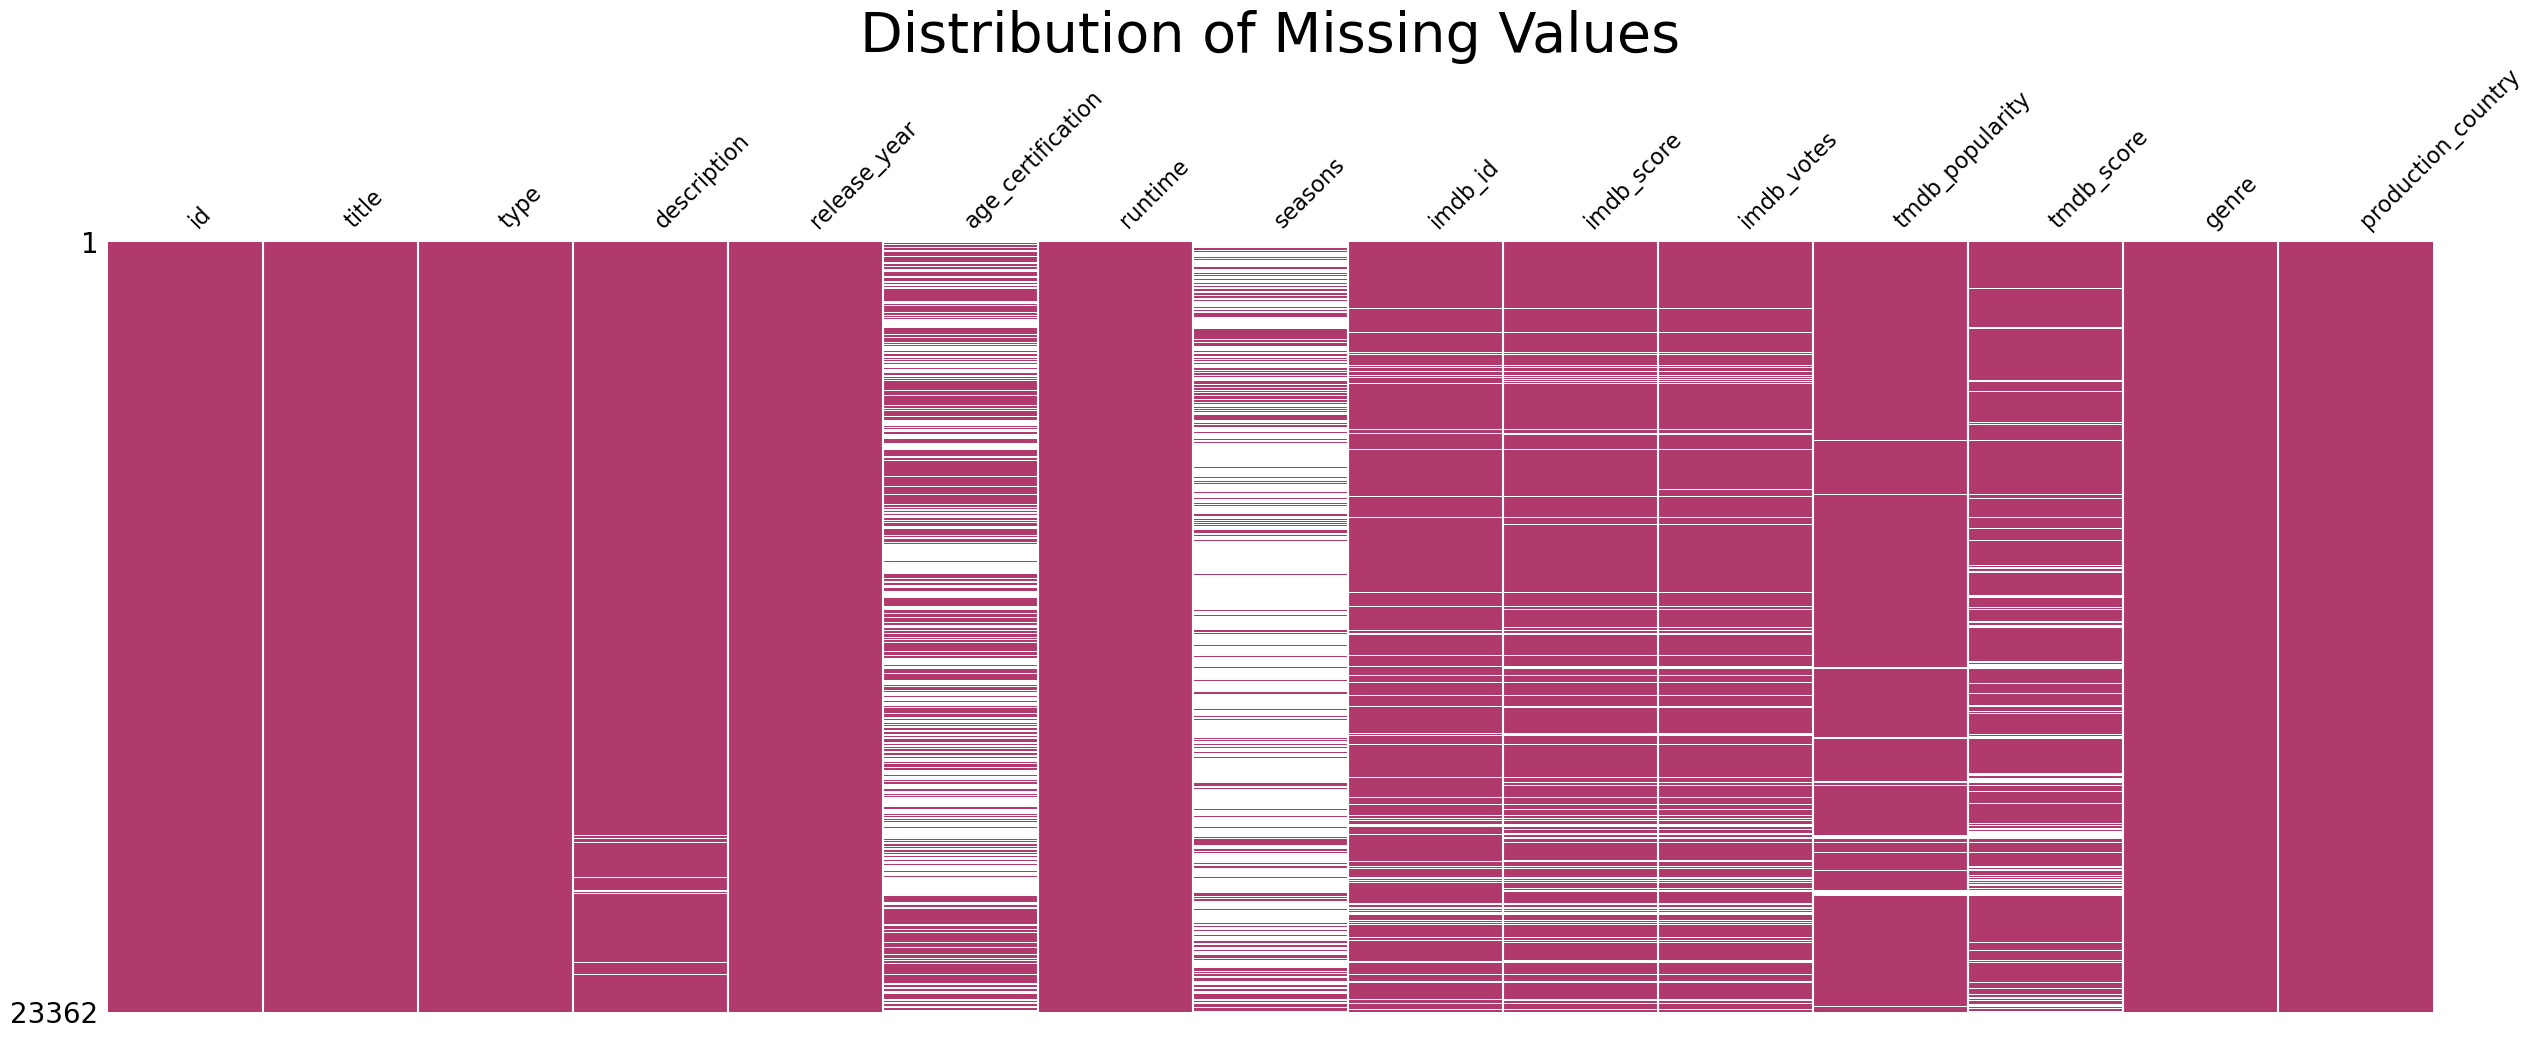

In [17]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

In [18]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,1.0,NaN,NaN,NaN,0.601,NaN,documentation,US
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,588100.0,106.361,7.782,drama,US
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,NaN,tt0077631,7.2,283316.0,33.160,7.406,romance,US
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,NaN,tt0070735,8.3,266738.0,24.616,8.020,crime,US
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,NaN,tt0079817,7.3,216307.0,75.699,7.246,drama,US


In [19]:
titles['genre'].unique()

array(['documentation', 'drama', 'romance', 'crime', 'fantasy', 'comedy',
       'thriller', 'action', 'animation', 'family', 'reality', 'scifi',
       'western', 'horror', '', 'war', 'music', 'history', 'sport',
       'european'], dtype=object)

In [20]:
titles['production_country'].unique()

array(['US', 'GB', 'EG', 'IN', 'DE', 'CA', 'LB', 'JP', 'AR', '', 'FR',
       'IE', 'AU', 'ET', 'HK', 'MX', 'CN', 'ES', 'CO', 'SU', 'IT', 'TR',
       'NZ', 'DK', 'TW', 'KR', 'RU', 'NG', 'PS', 'MY', 'PH', 'ZA', 'MA',
       'SE', 'SG', 'KE', 'NO', 'CL', 'SA', 'BR', 'ID', 'IS', 'IL', 'PL',
       'FI', 'CD', 'RO', 'AE', 'BE', 'NL', 'UA', 'QA', 'SY', 'GL', 'AT',
       'BY', 'JO', 'VN', 'TN', 'CZ', 'TH', 'GE', 'KH', 'CH', 'CU', 'UY',
       'PE', 'PR', 'KW', 'IR', 'PY', 'PK', 'HU', 'IQ', 'BD', 'TZ', 'CM',
       'KG', 'LU', 'SN', 'BT', 'PT', 'AO', 'GH', 'ZW', 'MW', 'GT', 'MU',
       'IO', 'BG', 'AF', 'DO', 'PA', 'FO', 'XC', 'DZ', 'MC', 'MK', 'BO',
       'EC', 'YU', 'LI', 'VE', 'SK', 'JM', 'RS', 'GR', 'LT', 'KZ', 'MT',
       'TT', 'XK', 'TC', 'NP', 'MN', 'NI', 'SB', 'CR', 'UZ', 'NA', 'EE',
       'LV', 'BM', 'PF', 'HN', 'CI', 'BW', 'ZM', 'BS'], dtype=object)

### Fill empty values in the columns above with NaN

In [21]:
titles['genre'] = titles['genre'].replace('', np.nan)
titles['production_country'] = titles['production_country'].replace('',np.nan)


In [22]:
titles['genre'].unique()

array(['documentation', 'drama', 'romance', 'crime', 'fantasy', 'comedy',
       'thriller', 'action', 'animation', 'family', 'reality', 'scifi',
       'western', 'horror', nan, 'war', 'music', 'history', 'sport',
       'european'], dtype=object)

In [23]:
titles.isnull().sum()

id                        0
title                     0
type                      0
description             195
release_year              0
age_certification     11981
runtime                   0
seasons               17739
imdb_id                1950
imdb_score             2558
imdb_votes             2618
tmdb_popularity         720
tmdb_score             3000
genre                   367
production_country     1049
dtype: int64

### Handling the seasons columns

#### Now let's deal with the 'seasons' column. At first glance, we can say that all the null values are of type 'MOVIE'. Let's see if this is true by comparing the number of null values with the number of movie titles that do not have a value in 'seasons'.

In [24]:
len(titles.loc[(titles['seasons'].isna()) & (titles['type'] == 'MOVIE')]) == titles.seasons.isna().sum()

True

In [25]:
# change all the null values from seasons to 0
titles['seasons'].fillna(0, inplace=True)

/tmp/ipykernel_7139/3170731522.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles['seasons'].fillna(0, inplace=True)


In [26]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,1.0,NaN,NaN,NaN,0.601,NaN,documentation,US
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,0.0,tt0075148,8.1,588100.0,106.361,7.782,drama,US
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,0.0,tt0077631,7.2,283316.0,33.160,7.406,romance,US
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,0.0,tt0070735,8.3,266738.0,24.616,8.020,crime,US
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,0.0,tt0079817,7.3,216307.0,75.699,7.246,drama,US


In [27]:
titles.isna().sum()

id                        0
title                     0
type                      0
description             195
release_year              0
age_certification     11981
runtime                   0
seasons                   0
imdb_id                1950
imdb_score             2558
imdb_votes             2618
tmdb_popularity         720
tmdb_score             3000
genre                   367
production_country     1049
dtype: int64

## Dropping some columns

In [28]:
# dropping 'imdb_id', and 'age_certification' columns
titles.drop(['imdb_id', 'age_certification'], axis=1, inplace=True)

In [29]:
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'genre', 'production_country'],
      dtype='object')

In [30]:
titles.isna().sum()

id                       0
title                    0
type                     0
description            195
release_year             0
runtime                  0
seasons                  0
imdb_score            2558
imdb_votes            2618
tmdb_popularity        720
tmdb_score            3000
genre                  367
production_country    1049
dtype: int64

### Removing other Null values

In [31]:
titles.dropna(inplace=True)

In [32]:
titles.isna().sum()

id                    0
title                 0
type                  0
description           0
release_year          0
runtime               0
seasons               0
imdb_score            0
imdb_votes            0
tmdb_popularity       0
tmdb_score            0
genre                 0
production_country    0
dtype: int64

In [33]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18374 entries, 1 to 25243
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18374 non-null  object 
 1   title               18374 non-null  object 
 2   type                18374 non-null  object 
 3   description         18374 non-null  object 
 4   release_year        18374 non-null  int64  
 5   runtime             18374 non-null  int64  
 6   seasons             18374 non-null  float64
 7   imdb_score          18374 non-null  float64
 8   imdb_votes          18374 non-null  float64
 9   tmdb_popularity     18374 non-null  float64
 10  tmdb_score          18374 non-null  float64
 11  genre               18374 non-null  object 
 12  production_country  18374 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


# Creating Content Based Recommender

### We will build a recommendation system based on the description of titles. We will calculate pairwise similarity scores for all movies/tv shows based on their descriptions and recommend titles with similar scores.

In [34]:
titles['description'].head()

1    When world heavyweight boxing champion, Apollo...
2    Australian good girl Sandy and greaser Danny f...
3    A novice con man teams up with an acknowledged...
4    After Rocky goes the distance with champ Apoll...
5    King Arthur, accompanied by his squire, recrui...
Name: description, dtype: object

In [35]:
# create a streaming platform column to present where the titles are available
lt = []
for i in titles['id']:
     movie_streaming = []
     if i in amazon_titles['id'].values:
        movie_streaming.append('amazon')
     if i in appletv_titles['id'].values:
        movie_streaming.append('appletv')
     if i in disney_titles['id'].values:
        movie_streaming.append('disney+')
     if i in hbo_titles['id'].values:
        movie_streaming.append('hbomax')
     if i in netflix_titles['id'].values:
        movie_streaming.append('netflix')
     if i in paramount_titles['id'].values:
        movie_streaming.append('paramount+')
     lt.append(movie_streaming)

    

In [36]:
titles['streaming_platform'] = lt

In [37]:
titles['streaming_platform']

1        [amazon, disney+, paramount+]
2                 [amazon, paramount+]
3                             [amazon]
4        [amazon, disney+, paramount+]
5                             [amazon]
                     ...              
25237                     [paramount+]
25239                     [paramount+]
25240                     [paramount+]
25241                     [paramount+]
25243                     [paramount+]
Name: streaming_platform, Length: 18374, dtype: object

In [38]:
titles.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,119,0.0,8.1,588100.0,106.361,7.782,drama,US,"[amazon, disney+, paramount+]"
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,110,0.0,7.2,283316.0,33.160,7.406,romance,US,"[amazon, paramount+]"
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,129,0.0,8.3,266738.0,24.616,8.020,crime,US,[amazon]
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,119,0.0,7.3,216307.0,75.699,7.246,drama,US,"[amazon, disney+, paramount+]"
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,0.0,8.2,547292.0,20.964,7.804,fantasy,GB,[amazon]


In [39]:
titles.shape

(18374, 14)

## Separate Data

### Separate Data by creating two different DataFrames

In [40]:
# DataFrames are movies and shows
movies = titles[titles['type'] == 'MOVIE'].copy()
shows = titles[titles['type'] == 'SHOW'].copy()


In [41]:
movies.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,119,0.0,8.1,588100.0,106.361,7.782,drama,US,"[amazon, disney+, paramount+]"
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,110,0.0,7.2,283316.0,33.160,7.406,romance,US,"[amazon, paramount+]"
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,129,0.0,8.3,266738.0,24.616,8.020,crime,US,[amazon]
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,119,0.0,7.3,216307.0,75.699,7.246,drama,US,"[amazon, disney+, paramount+]"
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,0.0,8.2,547292.0,20.964,7.804,fantasy,GB,[amazon]


In [42]:
shows.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
7,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,4.0,8.8,75654.0,24.773,8.258,comedy,GB,[amazon]
17,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,43,1.0,8.1,2199.0,1.475,7.000,comedy,GB,[amazon]
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,24,9.0,8.9,326487.0,270.409,8.294,comedy,US,[amazon]
47,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,10,24.0,6.5,5528.0,72.342,6.483,animation,GB,"[amazon, disney+]"
51,ts2760,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,10,13.0,6.1,1875.0,50.615,6.826,comedy,GB,"[amazon, disney+]"


## Compute Term Frequency-Inverse Document Frequency (TF-IDF)

In [43]:
#Define a TF-IDF Vectorizer Object. 
#This remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [45]:
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies['description'])

tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

In [46]:
# output the shape of description
print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')


Shape for Movies: (13831, 35074)
Shape for Shows: (4543, 19365)


#### We see that over 35k different words were used to describe the 13831 titles in our movies dataset, and 19k different words to describe the 4543 titles in our shows dataset.
#### Now, we need to calculate the similarity score. We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies/shows.

In [47]:
# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)

#### Now we create a way to identify the index of a movie/show in our data, given its title.

In [48]:
indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [49]:
# Now, we define functions that accept a movie/show title as input 
# and produce a list of the 10 most similar titles.

def get_title(title,indices):
    """
    Function that gets the 'index searcher' and searches
    the user's title index
    """
    try:
        index = indices[title]
    except:
        print("\n Title not found")
        return None
    if isinstance(index, np.int64):
        return index
    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

In [57]:
def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    """
    A function that takes a movie title as input and prints on the screen
    the 10 most similar movies based on the input description.
    """    
    
    title = get_title(title, indices_movies)
    if title == None:
        return 
    
    idx = indices_movies[title]
      
    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year','streaming_platform']].iloc[movie_indices])

    print('**' * 40)

In [58]:
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    """
        A function that takes a show title as input and prints on the screen
        the 10 most similar shows based on the input description 
    """
    title = get_title(title, indices_shows)
    if title == None:
        return 
    idx = indices_shows[title]
    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Get the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year', 'streaming_platform']].iloc[show_indices])

    print('**' * 40)


In [59]:
get_recomendations_movie('Rocky')

Title: The Sting |  Year: 1973
********************************************************************************
                              title  release_year  \
2                            Grease          1978   
3                         The Sting          1973   
4                          Rocky II          1979   
5   Monty Python and the Holy Grail          1975   
6                      Animal House          1978   
8                     Life of Brian          1979   
9                   White Christmas          1954   
10                           Heroes          1977   
11                Play Misty for Me          1971   
12                    Cairo Station          1958   

               streaming_platform  
2            [amazon, paramount+]  
3                        [amazon]  
4   [amazon, disney+, paramount+]  
5                        [amazon]  
6                        [amazon]  
8                        [amazon]  
9                        [amazon]  
10              

/tmp/ipykernel_7139/3275016385.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices_movies[title]


In [60]:
get_recommendations_show('Narcos')

Title: Underbelly | Year: 2008
********************************************************************************
                                 title  release_year streaming_platform
1568                        Dirty John          2018           [amazon]
8558                          Our Boys          2019          [appletv]
24102            This Is Not Happening          2015       [paramount+]
3222                         Stateless          2020           [amazon]
343                         Kath & Kim          2002           [amazon]
21552               Pixar in Real Life          2019          [netflix]
16691                  Inés of My Soul          2020          [disney+]
2762                        Queen Sono          2020           [amazon]
7160                        True Blood          2008          [appletv]
2420   Final Fantasy XIV: Dad of Light          2017           [amazon]
********************************************************************************


/tmp/ipykernel_7139/1489558798.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices_shows[title]
